## tessssssttttt

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid",palette='dark')

In [19]:
cities = pd.read_csv("Data/cities.csv")
population = pd.read_csv("Data/Population_data.csv")

In [4]:
cities.head()

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


In [21]:
def rename_df(x):
    x = x.replace('"',"")
    x = x.replace(' ',"")
    return x
cities.rename(columns=rename_df, inplace=True)

In [17]:
cities.head()

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


In [34]:
population.head()

,City,Population_2020,Growth_rate
0,"""Youngstown""",171958,1.684645
1,"""Yankton""",721155,1.380465
2,"""Yakima""",181932,0.542239
3,"""Worcester""",415838,1.096527
4,"""Wisconsin Dells""",309178,2.634026


1. Ajouter une colonne "Latitude totale" et "Longitude totale" dans le fichier 
cities.csv


In [26]:
cities["Latitude totale"] = cities.LatD + (cities.LatM / 60) + (cities.LatS / 3600)
cities["Longitude totale"] = cities.LonD + (cities.LonM / 60) + (cities.LonS / 3600)

2. Filtrer les villes situées dans l'hémisphère Nord

In [32]:
cities_nord = cities[cities["NS"] == "N"]

In [43]:
cities_nord

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,Latitude totale,Longitude totale
0,41,5,59,N,80,39,0,"""W""","""Youngstown""",OH,41.099722,80.650000
1,42,52,48,N,97,23,23,"""W""","""Yankton""",SD,42.880000,97.389722
2,46,35,59,N,120,30,36,"""W""","""Yakima""",WA,46.599722,120.510000
3,42,16,12,N,71,48,0,"""W""","""Worcester""",MA,42.270000,71.800000
4,43,37,48,N,89,46,11,"""W""","""Wisconsin Dells""",WI,43.630000,89.769722
...,...,...,...,...,...,...,...,...,...,...,...,...
123,39,31,12,N,119,48,35,"""W""","""Reno""",NV,39.520000,119.809722
124,50,25,11,N,104,39,0,"""W""","""Regina""",SA,50.419722,104.650000
125,40,10,48,N,122,14,23,"""W""","""Red Bluff""",CA,40.180000,122.239722
126,40,19,48,N,75,55,48,"""W""","""Reading""",PA,40.330000,75.930000


3. Fusionner les deux DataFrames sur la colonne "City"


In [36]:
df_merged = pd.merge(cities,population,how="left", on="City")

4. Calculer la population projetée pour 2025

In [40]:
df_merged["Population_2025"] = df_merged.Population_2020 * pow(1 + (df_merged.Growth_rate/100),5)

5. Afficher les villes avec une population projetée supérieure à 1 million en 2025


In [42]:
df_merged[df_merged.Population_2025 > 1000000]

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,Latitude totale,Longitude totale,Population_2020,Growth_rate,Population_2025
15,33,54,0,N,98,29,23,"""W""","""Wichita Falls""",TX,33.900000,98.489722,962756,1.612455,1.042920e+06
39,30,49,47,N,83,16,47,"""W""","""Valdosta""",GA,30.829722,83.279722,967040,2.313252,1.084186e+06
42,32,20,59,N,95,18,0,"""W""","""Tyler""",TX,32.349722,95.300000,920910,3.328561,1.084724e+06
52,39,2,59,N,95,40,11,"""W""","""Topeka""",KS,39.049722,95.669722,955778,3.149841,1.116092e+06
57,30,27,0,N,84,16,47,"""W""","""Tallahassee""",FL,30.450000,84.279722,952648,1.316397,1.017024e+06
90,44,47,59,N,106,57,35,"""W""","""Sheridan""",WY,44.799722,106.959722,956606,3.493221,1.135776e+06
92,32,25,11,N,87,1,11,"""W""","""Selma""",AL,32.419722,87.019722,960790,3.429845,1.137255e+06
96,41,52,11,N,103,39,36,"""W""","""Scottsbluff""",NB,41.869722,103.660000,946942,2.403054,1.066321e+06
138,37,16,12,N,79,56,24,"""W""","""Roanoke""",VA,37.270000,79.940000,976075,1.282488,1.040291e+06
144,45,38,23,N,89,25,11,"""W""","""Rhinelander""",WI,45.639722,89.419722,887646,3.147909,1.036435e+06


6. Créer un graphique de la population projetée pour 2025

<Axes: xlabel='City', ylabel='Population_2025'>

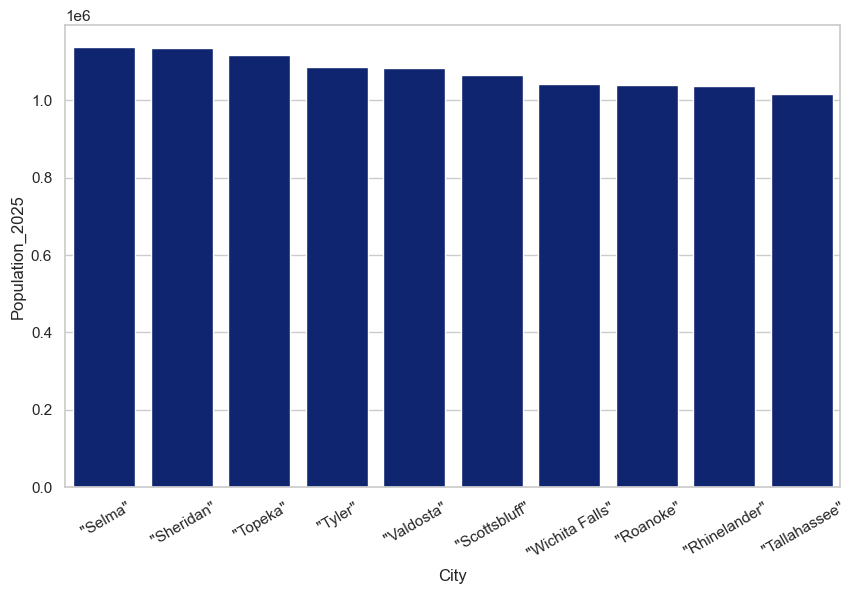

In [49]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=30)

sns.barplot(df_merged.nlargest(10,'Population_2025'), x='City',y='Population_2025')

7. Calculer la densité de population des villes

In [70]:
df_merged['Area'] = np.random.randint(10, 500, df_merged.shape[0])


In [71]:
df_merged["densite_population"] = df_merged.Population_2020 / df_merged.Area

8. Trouver la ville avec la plus grande et la plus petite population


In [61]:
df_merged.loc[df_merged["Population_2020"].idxmax()].City

' "Roanoke"'

In [62]:
df_merged.loc[df_merged["Population_2020"].idxmin()].City

' "Saint Augustine"'

9. Filtrer les villes avec une densité de population supérieure à 5000 habitants/km²

In [72]:
df_merged.loc[df_merged["densite_population"] > 5000].City

9               "Wilmington"
14              "Williamson"
17                "Wheeling"
22                  "Wausau"
28                "Waterloo"
39                "Valdosta"
42                   "Tyler"
45                  "Tupelo"
61                  "Sumter"
66                "Sterling"
68             "Springfield"
69             "Springfield"
70             "Springfield"
71             "Springfield"
82             "Springfield"
83             "Springfield"
84                 "Spokane"
85              "South Bend"
91                "Seminole"
95                "Scranton"
99      "Sault Sainte Marie"
101             "Santa Rosa"
102               "Santa Fe"
107               "Sandusky"
110            "San Antonio"
129                "Rutland"
141               "Richmond"
144            "Rhinelander"
Name: City, dtype: object

10. Trouver la moyenne et la médiane de la population des villes

In [73]:
df_merged.Population_2020.mean

<bound method Series.mean of 0      171958
1      721155
2      181932
3      415838
4      309178
        ...  
145    426896
146     98984
147    352918
148    314712
149    170151
Name: Population_2020, Length: 150, dtype: int64>

In [76]:
df_merged.Population_2020.median

<bound method Series.median of 0      171958
1      721155
2      181932
3      415838
4      309178
        ...  
145    426896
146     98984
147    352918
148    314712
149    170151
Name: Population_2020, Length: 150, dtype: int64>

11. Créer une nouvelle colonne pour la population normalisée

In [79]:
df_merged["Population_norm"] = (df_merged["Population_2020"] - df_merged.Population_2020.min() ) / (df_merged.Population_2020.max() - df_merged.Population_2020.min())

12. Utiliser NumPy pour créer un tableau de statistiques descriptives

In [81]:
df_merged.Population_2020.describe()

count       150.000000
mean     476303.746667
std      253222.755955
min       73247.000000
25%      285993.000000
50%      403531.000000
75%      697149.000000
max      976075.000000
Name: Population_2020, dtype: float64